## Training area for agents in Hunger Maze

In [1]:
# Imports
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import matplotlib.pyplot as plt
import maze_generator.maze_dataset as md
from Maze_env.reward_functions.maze_runner import MazeRunnerRewardsFun
import numpy as np
from DQN.training.basic import BaseTraining
from DQN.agents.hungermaze import HungerGamesAgent
from DQN.agents.basic import BaseAgent
from Maze_env.game_info import basic_info
from Maze_env.reward_functions.hunger_games import HungerGamesRewardsFun
from Maze_env.wrappers.reward_wrappers.hunger_games_rewards import HungerGamesRewards

from Maze_env.game_info.hunger_games_info import HungerGames
from Maze_env.game_info.team_hunger_games_info import TeamHungerGames

import DQN.models.base as base
import os
print(os.getcwd())

/home/cody/Documents/DataSciBC/Generative_AI/maze_game/TrainingGround


### Define the Mazes

In [2]:
dataset = md.Maze_dataset(1,(3,3),maze_type = 'percolation')

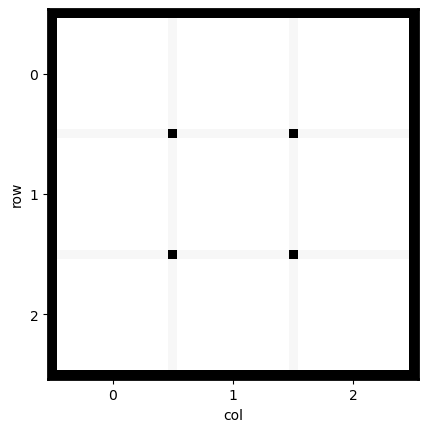

In [3]:
# example of the maze
dataset.show_maze(0)

In [4]:
# parameters for the agents
n_agents = 1
vision = 3

In [5]:
%matplotlib notebook


# --- Agents for the Hunger Games --- #
rewards = rewards = HungerGamesRewardsFun(
                        GOAL = 100.0,
                         SEE_GOAL = 0.00,
                         DONT_SEE_GOAL = -0.00,
                         NEW_PLACE = 50.0,
                         OLD_PLACE = -0.75,
                         GET_CLOSER = 50.0, 
                         GET_CLOSER_CONSTANT = 50.0,
                         GET_FARTHER = -30.0,
                         GET_FARTHER_CONSTANT = -30.0,
                         DIST = 0.0,
                         HIT_OTHER = -500.0,
                         TOO_CLOSE = -0.01,
                         TOO_CLOSE_CONSTANT = -0.01,
                )
game_info = HungerGames()
game_info.update_game_info(
                           rewards_dist = {'agents': rewards}

)
maze_agent =BaseAgent({'agents':base.CNN_version1},
                               vision={'agents':vision},
                               action_type='cardinal',
                               dist_paradigm='path',
                               game_info=game_info
)

# --- trainer of the agent --- #
train = BaseTraining(name = 'FFAHG_training',
                              maze_dataset = dataset,
                              maze_agent = maze_agent,
                              len_game=50,
                              n_objects={'agents':n_agents},
                              final_epsilon = 0.05,
                              gamma = 0.99,
                              tau = 0.0001,
                               batch_size = 64,
                              n_frames = 500000,
                              lr = 0.0005,
                              lr_step_size=5000,
                              lr_gamma = 0.98,
                              lr_head_gamma = 0.98,
                              l2_regular=0.01,
                              replay_buffer_size=300000,
                              replay_buffer_min_perc=0.1,
                              target_update=5000,
                              policy_update=1,
                              lambda_entropy=0.1,
                              beta = 0.4,
                              alpha = 0.6,
                              decay_total = 300000,
                              per = True,
                              frame_mult=1.5,
                              )
train.train(test_agent=False,peak=False)

Reward Distribution for object agents
----------------Rewards Distribution --------------
HIT_OTHER: -500.0
TOO_CLOSE: -0.01
TOO_CLOSE_CONSTANT: -0.01
SEE_GOAL: 0.0
DONT_SEE_GOAL: -0.0
NEW_PLACE: 50.0
OLD_PLACE: -0.75
GET_CLOSER: 50.0
GET_CLOSER_CONSTANT: 50.0
GET_FARTHER: -30.0
GET_FARTHER_CONSTANT: -30.0
DIST: 0.0
GOAL: 100.0
FAIL: -1.0
-----------------------------------------------------
----------------------------------
Basic epsilon decay scheduler:
Start epsilon: 1
End epsilon: 0.05
Decay total: 300000
Decay rate: 0.0009935761740440755

------------------------------
Group 0: Learning rate = 0.0005
--------------------------------------
Basis learning rate scheduler:
Step size: 5000
Gamma: 0.98


/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'dict'>
  logger.warn(


KeyboardInterrupt: 

In [ ]:
train.save()
train.results()

KeyError: 'bogus'

In [ ]:
train.agents.test_agent(dataset,n_episodes=1000,len_game=15,num_objects={'agents':n_agents})

/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'dict'>
  logger.warn(


{'agents': 0.12500000000000008}

In [ ]:

train.agents.run_agent(dataset[0],num_objects={'agents':n_agents},n_episodes=20,len_game=15,epsilon=0,init_pos={})


cumulative reward: {'agents': [-106.94444444444444, -101.38888888888889]}
cumulative reward: {'agents': [-25.25, -26.572222222222223]}
cumulative reward: {'agents': [-110.07757201646089, -106.58251028806585]}
cumulative reward: {'agents': [-117.77592592592593, -98.88703703703702]}
cumulative reward: {'agents': [-106.94444444444444, -98.88703703703702]}
cumulative reward: {'agents': [-106.94444444444444, -106.58251028806585]}
cumulative reward: {'agents': [-112.18950617283949, -101.38888888888889]}
cumulative reward: {'agents': [-110.07757201646089, -109.16193415637858]}
cumulative reward: {'agents': [-33.44444444444444, -27.9417695473251]}
cumulative reward: {'agents': [-106.58251028806585, -117.10432098765432]}
cumulative reward: {'agents': [-74.91296296296298, -98.88703703703702]}
cumulative reward: {'agents': [-112.49999999999999, -112.49999999999999]}
cumulative reward: {'agents': [-103.71954732510288, -101.38888888888889]}
cumulative reward: {'agents': [-30.328600823045267, -32.33